In [1]:
import os
from pathlib import Path
import torch
import matplotlib.pyplot as plt
from diffusion.model import Model

In [2]:
MODEL_PATH = Path("../model")

In [3]:
model = Model()
model.operator.load_state_dict(torch.load(MODEL_PATH.joinpath(os.listdir(MODEL_PATH, )[-1])))

[64, 32, 32, 64]


/home/jingyu/.cache/pypoetry/virtualenvs/diffusion--2hlmT2A-py3.11/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


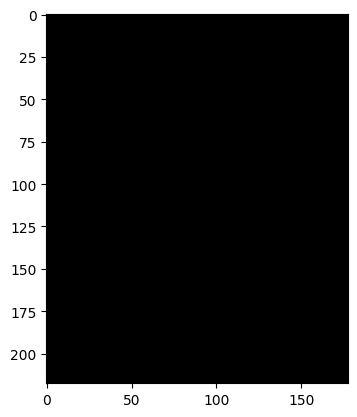

In [4]:
plt.imshow(model.infer((218, 178)))